
# Domain: Sports

# Project: EDA of Football league data

### Data:

The dataset contains football league data of European Premier League from 2012-16.

### Variables:
| Sl No | Field Name | Description |
|-|-|-|
|1|HomeTeam	|Name of team playing in home ground|
|2	|AwayTeam	|Name of team playing in away ground|
|3	|FTHG	|Home team goals at the end of match|
|4	|FTAG	|Away team goals at the end of match|
|5	|FTR	|Match results (h:home team win, a:away team win, d:draw)|
|6	|Referee	|Name of referee|
|7	|HST	|Home team shots on target|
|8	|AST	|Away team shots on target|
|9	|HF	|Home team fouls |
|10	|AF	|Away team fouls |
|11	|HC	|Home team corners|
|12	|AC	|Away team corners|
|13	|HY	|Home team yellow cards|
|14	|AY	|Away team yellow cards|
|15	|HR	|Home team red cards|
|16	|AR	|Away team red cards|

### Exploration ideas:
Summary Stat: Matches, Team, Referees, %Home Win, Away Win

Relegation Analysis

Best/Worst Performing teams

Playing Style: Foul, Shots



### Local path and importing packages

In [2]:
local_path='C:/SKCY/Python/ML/practice/'
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

### Load Data

In [3]:
col=['Date','HomeTeam','AwayTeam','Referee','FTHG','FTAG','FTR','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']
df_2012_13=pd.read_csv(local_path+'2012-13.csv',usecols=col,index_col='Date')
df_2012_13.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Date,,,,,,,,,,,,,,,,
19/05/2013,Swansea,Fulham,0,3,A,L Mason,11,6,12,9,8,0,2,1,0,0
19/05/2013,Tottenham,Sunderland,1,0,H,A Marriner,19,4,6,12,14,1,1,3,0,1
19/05/2013,West Brom,Man United,5,5,D,M Oliver,8,8,10,6,3,5,0,1,0,0
19/05/2013,West Ham,Reading,4,2,H,M Dean,12,7,14,8,6,4,2,1,0,0
19/05/2013,Wigan,Aston Villa,2,2,D,N Swarbrick,6,2,8,12,4,2,2,1,0,0


### Merge all years data in one dataframe

In [4]:
df_merge=df_2012_13.append(pd.read_csv(local_path+'2013-14.csv',usecols=col,index_col='Date'),ignore_index=False)
df_merge=df_merge.append(pd.read_csv(local_path+'2014-15.csv',usecols=col,index_col='Date'),ignore_index=False)
df_merge=df_merge.append(pd.read_csv(local_path+'2015-16.csv',usecols=col,index_col='Date'),ignore_index=False)


In [5]:
df_merge.shape

(1520, 16)

### Dropping single row with NULL value

In [6]:
df_merge.dropna(axis=0,how='all',inplace=True)
len(df_merge)-df_merge.count()

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
Referee     0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [7]:
df_merge.describe()

,FTHG,FTAG,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,1.524342,1.183553,5.586842,4.432237,10.511842,11.155921,6.098684,4.763158,1.465132,1.785526,0.061184,0.093421
std,1.303032,1.143948,3.231321,2.684780,3.322454,3.511108,3.142773,2.637994,1.187535,1.280862,0.250490,0.304383
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,7.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,8.000000,6.000000,20.000000,20.000000,23.000000,24.000000,18.000000,17.000000,7.000000,9.000000,2.000000,2.000000


### List of teams and match count

In [8]:
from collections import Counter
htmc=Counter(df_merge.HomeTeam)
print('Home Team Match:',htmc)

Home Team Match: Counter({'Arsenal': 76, 'Newcastle': 76, 'West Brom': 76, 'West Ham': 76, 'Man City': 76, 'Everton': 76, 'Chelsea': 76, 'Aston Villa': 76, 'Man United': 76, 'Southampton': 76, 'Swansea': 76, 'Tottenham': 76, 'Liverpool': 76, 'Stoke': 76, 'Sunderland': 76, 'Norwich': 57, 'Crystal Palace': 57, 'Fulham': 38, 'QPR': 38, 'Hull': 38, 'Leicester': 38, 'Reading': 19, 'Wigan': 19, 'Cardiff': 19, 'Burnley': 19, 'Bournemouth': 19, 'Watford': 19})


### Match Count of each Team played on Home ground

In [9]:
df_merge.groupby('HomeTeam').count()['FTR'].sort_values(ascending=False)

HomeTeam
Man United        76
Newcastle         76
Aston Villa       76
Chelsea           76
Everton           76
Liverpool         76
Man City          76
West Ham          76
Arsenal           76
Southampton       76
Stoke             76
Sunderland        76
Swansea           76
Tottenham         76
West Brom         76
Norwich           57
Crystal Palace    57
Fulham            38
Leicester         38
Hull              38
QPR               38
Burnley           19
Bournemouth       19
Reading           19
Cardiff           19
Watford           19
Wigan             19
Name: FTR, dtype: int64

### List of Matches played by each team on Away ground

In [10]:
df_merge.groupby('AwayTeam').count()['FTR'].sort_values(ascending=False)

AwayTeam
Man United        76
Newcastle         76
Aston Villa       76
Chelsea           76
Everton           76
Liverpool         76
Man City          76
West Ham          76
Arsenal           76
Southampton       76
Stoke             76
Sunderland        76
Swansea           76
Tottenham         76
West Brom         76
Norwich           57
Crystal Palace    57
Fulham            38
Leicester         38
Hull              38
QPR               38
Burnley           19
Bournemouth       19
Reading           19
Cardiff           19
Watford           19
Wigan             19
Name: FTR, dtype: int64

In [11]:
df_merge['Winner']='NA'
df_merge.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Winner
Date,,,,,,,,,,,,,,,,,
18/08/2012,Arsenal,Sunderland,0,0,D,C Foy,4,2,12,8,7,0,0,0,0,0,NA
18/08/2012,Fulham,Norwich,5,0,H,M Oliver,9,2,12,11,6,3,0,0,0,0,NA
18/08/2012,Newcastle,Tottenham,2,1,H,M Atkinson,4,6,12,8,3,5,2,2,0,0,NA
18/08/2012,QPR,Swansea,0,5,A,L Probert,11,8,11,14,5,3,2,2,0,0,NA
18/08/2012,Reading,Stoke,1,1,D,K Friend,3,3,9,14,4,3,2,4,0,1,NA


In [12]:
df_merge['Winner'][df_merge['FTR']=='H']=df_merge['HomeTeam']
df_merge['Winner'][df_merge['FTR']=='A']=df_merge['AwayTeam']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### What is Win% in Home and Away Ground?

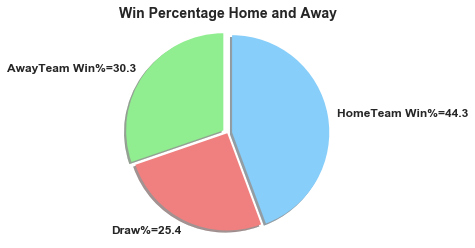

In [13]:
df_merge.head()
x=100*df_merge.groupby('FTR').count()['HomeTeam']/len(df_merge)
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(x,explode=[.05,0,.05],labels=['AwayTeam Win%='+str(x.ix[0].round(1)),
                                    'Draw%='+str(x.ix[1].round(1)),'HomeTeam Win%='+str(x.ix[2].round(1))],
        startangle=90,shadow=True,colors=colors,textprops={'Fontsize':'large', 'fontweight':'bold'})
plt.axis('equal')
plt.title('Win Percentage Home and Away',fontsize=14,fontweight='bold')

### Which team is best performing? Most Winner to Lowest Winner

### How is the Percentage of Win, Loss,Draw of Team on Home ground?

### How is the percentage of Win, Loss, Draw of teams when played on Away Ground


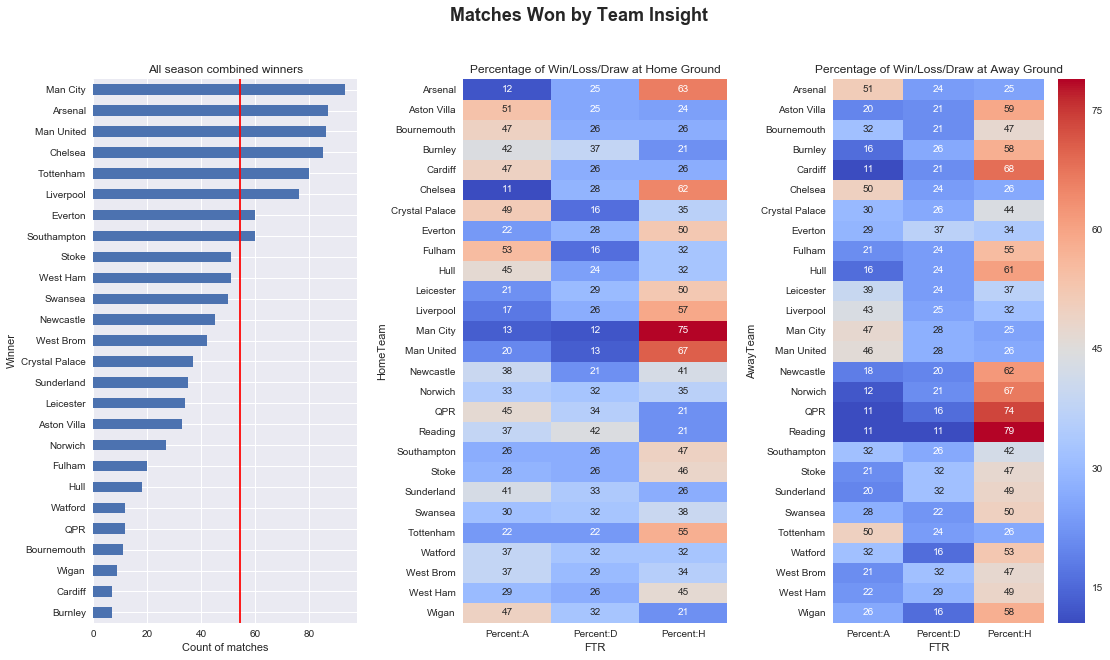

In [14]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.suptitle("Matches Won by Team Insight",fontsize=18,fontweight='bold')
                    
plt.subplot(1,3,1)
df_merge.groupby('Winner').count()['FTR'].sort_values(ascending=True).ix[1:-1].plot(kind='barh',grid=True)
plt.axvline(np.mean(df_merge.groupby('Winner').count()['FTR']),color='r')
#df_win.ix[1:-1]
plt.title('All season combined winners')
plt.xlabel('Count of matches')
#plt.tight_layout()

plt.subplot(1,3,2)
df_home_team=df_merge.pivot_table(values='AwayTeam',index='HomeTeam',columns='FTR',aggfunc='count')
Total=df_home_team.sum(axis=1)
for i in df_home_team.columns.tolist():
    df_home_team['Percent:'+i]=100*df_home_team[i]/Total
sns.heatmap(df_home_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True,cbar=False)
plt.title('Percentage of Win/Loss/Draw at Home Ground')
#plt.tight_layout()

plt.subplot(1,3,3)
df_away_team=df_merge.pivot_table(values='HomeTeam',index='AwayTeam',columns='FTR',aggfunc='count')
Total=df_away_team.sum(axis=1)
for i in df_away_team.columns.tolist():
    df_away_team['Percent:'+i]=100*df_away_team[i]/Total
sns.heatmap(df_away_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True)
plt.title('Percentage of Win/Loss/Draw at Away Ground')
#plt.tight_layout()
                    

### Which team is best performing? Most Winner to Lowest Winner
**Conclusion:**
1) Man City, Arsenol, ManCity, Chelsea, Totenham are the best winners

### How is the Percentage of Win, Loss,Draw of Team on Home ground?
**Conclusion:**
1) Man City, Man United, Arsenol, Chelsea, Liverpool are the best team on Home Ground respectively in order
2) Fulham, Aston Villa, Crystal Palace, Wigan, Cardiff, Bournemouth lowest performing team on Home Ground,respectively in order, they loose close to 50% of matches
3) Reading is the team who makes most draws on Home ground

### How is the percentage of Win, Loss, Draw of teams when played on Away Ground
**Conclusion:**
1) Best teams in away ground: Arsenol, Chelsea, Tottenham, Man City, Man United
2) Worst teams in away ground: Reading, QPR, Cardiff, Norwich, Necastle
3) Most draws made by Everton on away ground

In [15]:
#df_merge

In [16]:
###This portion is not working
'''
for i in range(0,len(df_merge)):
    if df_merge.iloc[i]['FTR']=='H':
        df_merge.iloc[i]['Winner']=df_merge.iloc[i]['HomeTeam']
    elif df_merge.iloc[i]['FTR']=='A':
        df_merge.iloc[i]['Winner']=df_merge.iloc[i]['AwayTeam']
    else:
        df_merge.iloc[i]['Winner']='Drawn'
df_merge.head()
'''

"\nfor i in range(0,len(df_merge)):\n    if df_merge.iloc[i]['FTR']=='H':\n        df_merge.iloc[i]['Winner']=df_merge.iloc[i]['HomeTeam']\n    elif df_merge.iloc[i]['FTR']=='A':\n        df_merge.iloc[i]['Winner']=df_merge.iloc[i]['AwayTeam']\n    else:\n        df_merge.iloc[i]['Winner']='Drawn'\ndf_merge.head()\n"

In [17]:
#df_merge.head()
df_merge.iloc[1]['FTR']

'H'

### Goal made by team in Home Ground and Away Ground


In [18]:
pd.set_option('display.max_columns',500)
df_goal=df_merge.pivot_table(values=['FTHG','FTAG'],index='HomeTeam',columns='AwayTeam',aggfunc='sum')
#df_goal

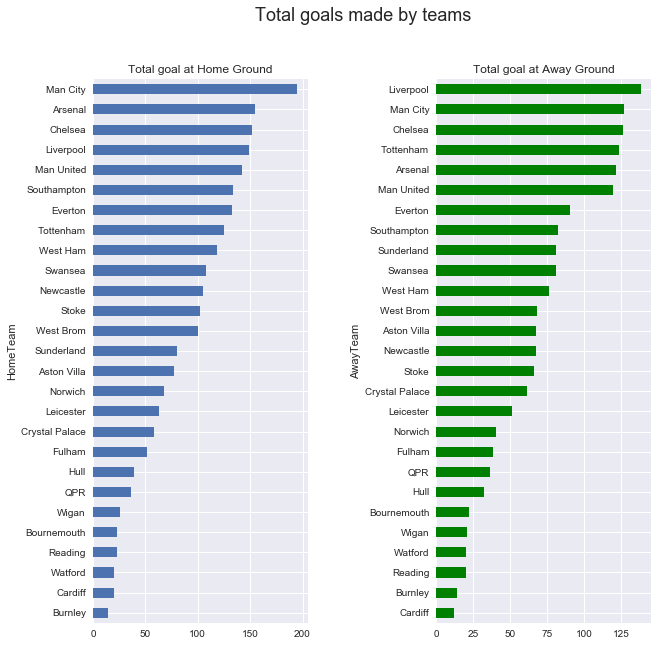

In [19]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace= .6)
plt.suptitle('Total goals made by teams',fontsize=18)
plt.subplot(1,2,1)
df_goal.xs('FTHG',level=0,axis=1).sum(axis=1).sort_values(ascending=True).plot(kind='barh')
plt.title('Total goal at Home Ground')
plt.subplot(1,2,2)
df_goal.xs('FTAG',level=0,axis=1).sum(axis=0).sort_values().plot(kind='barh',color='g')
plt.title('Total goal at Away Ground')

### Goal made by team in Home Ground and Away Ground

**Conclusion:**

1) Man City, Arsenol, Chelsea, Liverpool, Man United in Home Ground respectively
2) Liverpool, Man City, Chelsea, Tottenham, Arsenal at Away Ground respectively

### Which team score how many goals against which team on both Home and Away Ground 

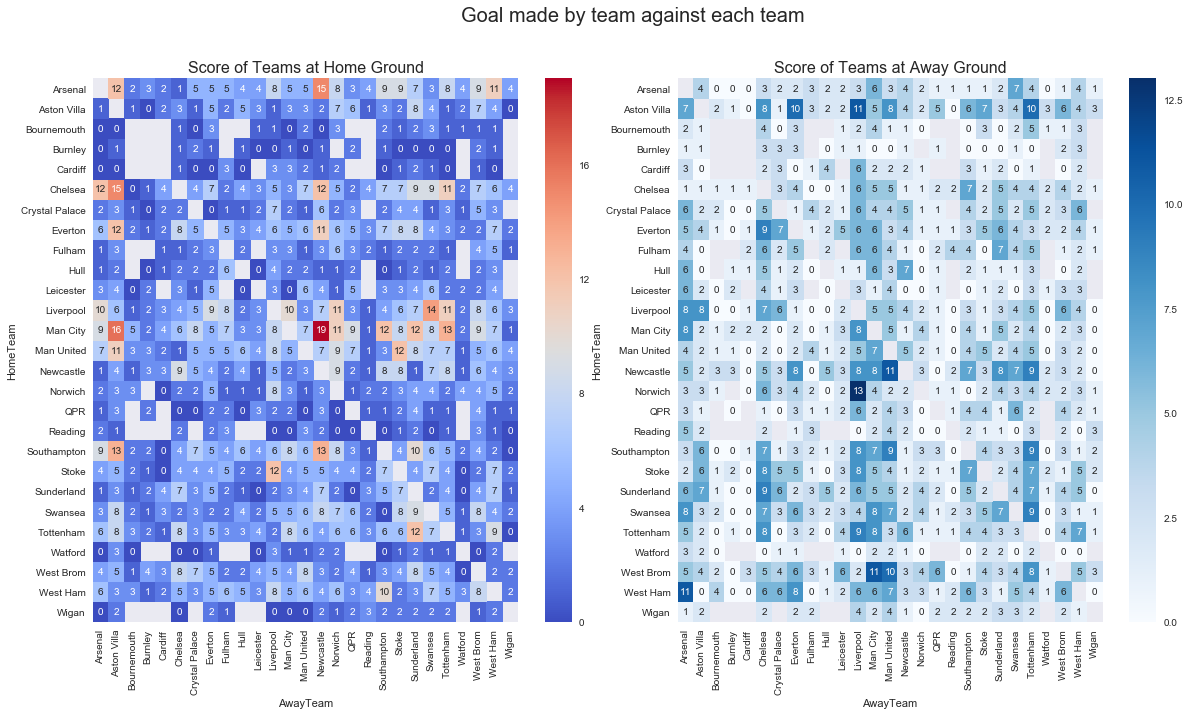

In [20]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.1)
plt.suptitle('Goal made by team against each team',fontsize=20)
plt.subplot(1,2,1)
sns.heatmap(df_goal.xs('FTHG',level=0,axis=1),cmap='coolwarm',annot=True)
plt.title('Score of Teams at Home Ground', fontsize=16)
#sns.heatmap(df_HGgoal.xs)
plt.subplot(1,2,2)
sns.heatmap(df_goal.xs('FTAG',level=0,axis=1),cmap='Blues',annot=True)
plt.title('Score of Teams at Away Ground',fontsize=16)

### Is there any corelation between Number of matches won verses goal scored?


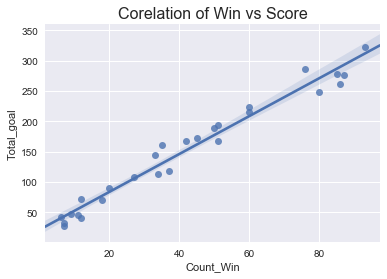

In [21]:
df_win=df_merge.groupby('Winner').count()['FTR']
df_total_goals=df_goal.xs('FTHG',level=0,axis=1).sum(axis=1)+df_goal.xs('FTAG',level=0,axis=1).sum(axis=0)
df_win_goal=pd.concat({'Count_Win':df_win,'Total_goal':df_total_goals},axis=1).dropna()
#plt.scatter(df_win_goal.Count_Win,df_win_goal.Total_goal)
sns.regplot('Count_Win','Total_goal',df_win_goal)
plt.title('Corelation of Win vs Score',fontsize=16)

### Is there any co-relation between Number of matches won verses goal scored?
**Conclusion:**
1) There are strong positive co-relation between Goals scored and Matches won.

In [22]:
df_merge.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Winner
Date,,,,,,,,,,,,,,,,,
18/08/2012,Arsenal,Sunderland,0,0,D,C Foy,4,2,12,8,7,0,0,0,0,0,NA
18/08/2012,Fulham,Norwich,5,0,H,M Oliver,9,2,12,11,6,3,0,0,0,0,Fulham
18/08/2012,Newcastle,Tottenham,2,1,H,M Atkinson,4,6,12,8,3,5,2,2,0,0,Newcastle
18/08/2012,QPR,Swansea,0,5,A,L Probert,11,8,11,14,5,3,2,2,0,0,Swansea
18/08/2012,Reading,Stoke,1,1,D,K Friend,3,3,9,14,4,3,2,4,0,1,NA


### What are corelation between different variables
**Conclusion:**\n
1) Number of corner and goals have poitive correlation, more the corner kicks more goals\n
2) Corner and shot on target is positively corelated, more the corner kicks more the shots on targets\n
3) Moderate positive corelated foul vs yellow card\n
4) Goal and shot on target is positively corelated

In [23]:
df_merge_piv_h=df_merge.pivot_table(values=['FTHG','HST','HF','HC','HY','HR'],index='HomeTeam',aggfunc=np.mean)
df_merge_piv_h['Team']='HomeTeam'
df_merge_piv_h.rename(index=str,columns={'FTHG':'Goal','HC':'Corner','HF':'Foul','HR':'Red_Card','HST':'Shot_Target',
                                      'HY':'Yellow_Card'},inplace=True)
df_merge_piv_h
df_merge_piv_a=df_merge.pivot_table(values=['FTAG','AST','AF','AC','AY','AR'],index='AwayTeam',aggfunc=np.mean)
df_merge_piv_a['Team']='AwayTeam'
df_merge_piv_a.rename(index=str,columns={'FTAG':'Goal','AC':'Corner','AF':'Foul','AR':'Red_Card','AST':'Shot_Target',
                                        'AY':'Yellow_Card'},inplace=True)
df_m_ha=pd.concat([df_merge_piv_h,df_merge_piv_a],axis=0,ignore_index=False)
#df_m_ha.sort_values('Corner',ascending=False)

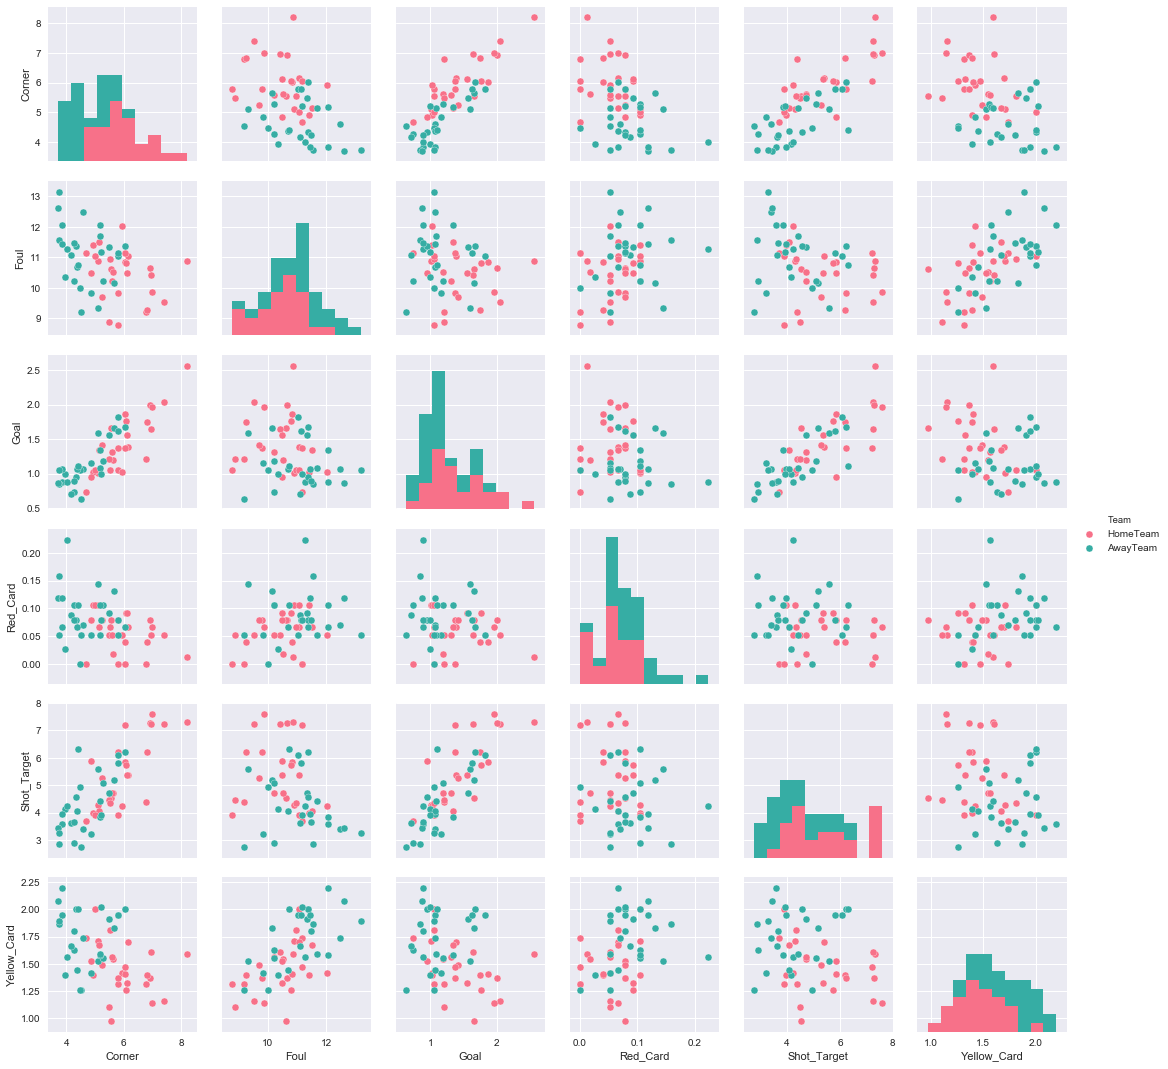

In [24]:
sns.pairplot(df_m_ha,hue='Team',palette='husl',kind='scatter')
plt.show()

In [25]:
df_m_ha.drop('Team',axis=1)
df_m_ha_m=df_m_ha.groupby(df_m_ha.index).mean()

### Playing style analysis of Teams: Avergae Corner, Shot on Target,Goals

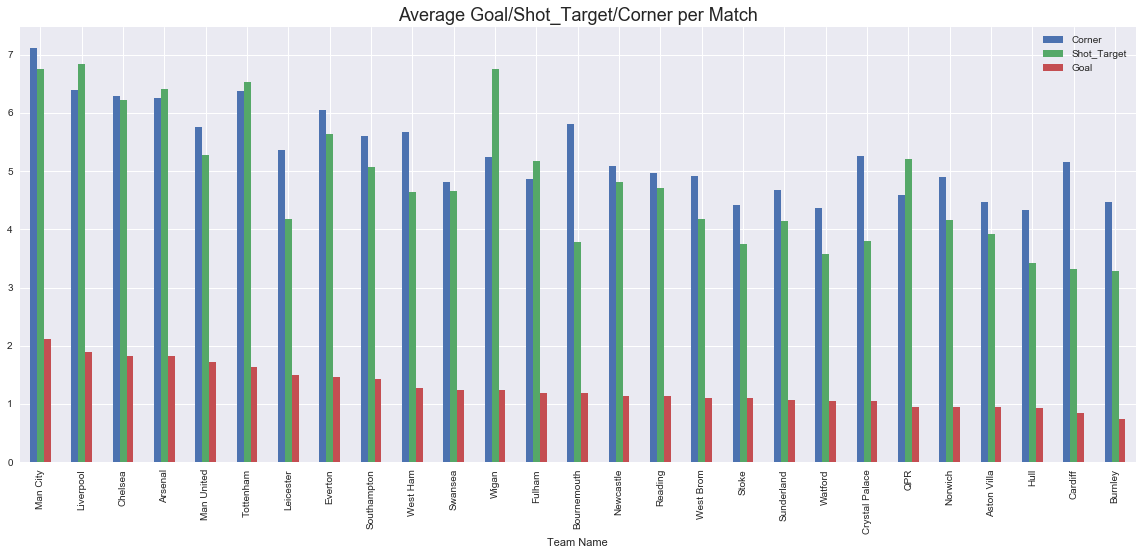

In [26]:
df_m_ha_m.sort_values('Goal',ascending=False,inplace=True)
df_m_ha_m[['Corner','Shot_Target','Goal']].plot(kind='bar',figsize=(20,8),label=df_m_ha_m.index)
plt.xlabel("Team Name")
a=np.arange(len(df_m_ha_m))
plt.xticks(a,(df_m_ha_m.index),rotation=90)
plt.title('Average Goal/Shot_Target/Corner per Match', fontsize=18)
plt.show()


### Referee analysis

1) How many Referees used, how many matched each Referee played?

In [27]:
df_merge.groupby('Referee').count()['FTR'].sort_values()

Referee
S Hooper           1
K Stroud           3
G Scott            5
P Tierney          5
S Attwell          5
M Halsey          18
R Madley          43
R East            52
L Probert         53
C Foy             60
C Pawson          60
H Webb            61
P Dowd            72
N Swarbrick       75
K Friend          85
M Jones           89
A Marriner        93
L Mason           96
J Moss           101
A Taylor         104
M Oliver         104
M Clattenburg    106
M Atkinson       112
M Dean           117
Name: FTR, dtype: int64

### Card per match by Referee

In [28]:
df_Referee=df_merge.pivot_table(values=['AR','AY','HR','HY'],index='Referee',aggfunc=np.mean)
#df_Referee

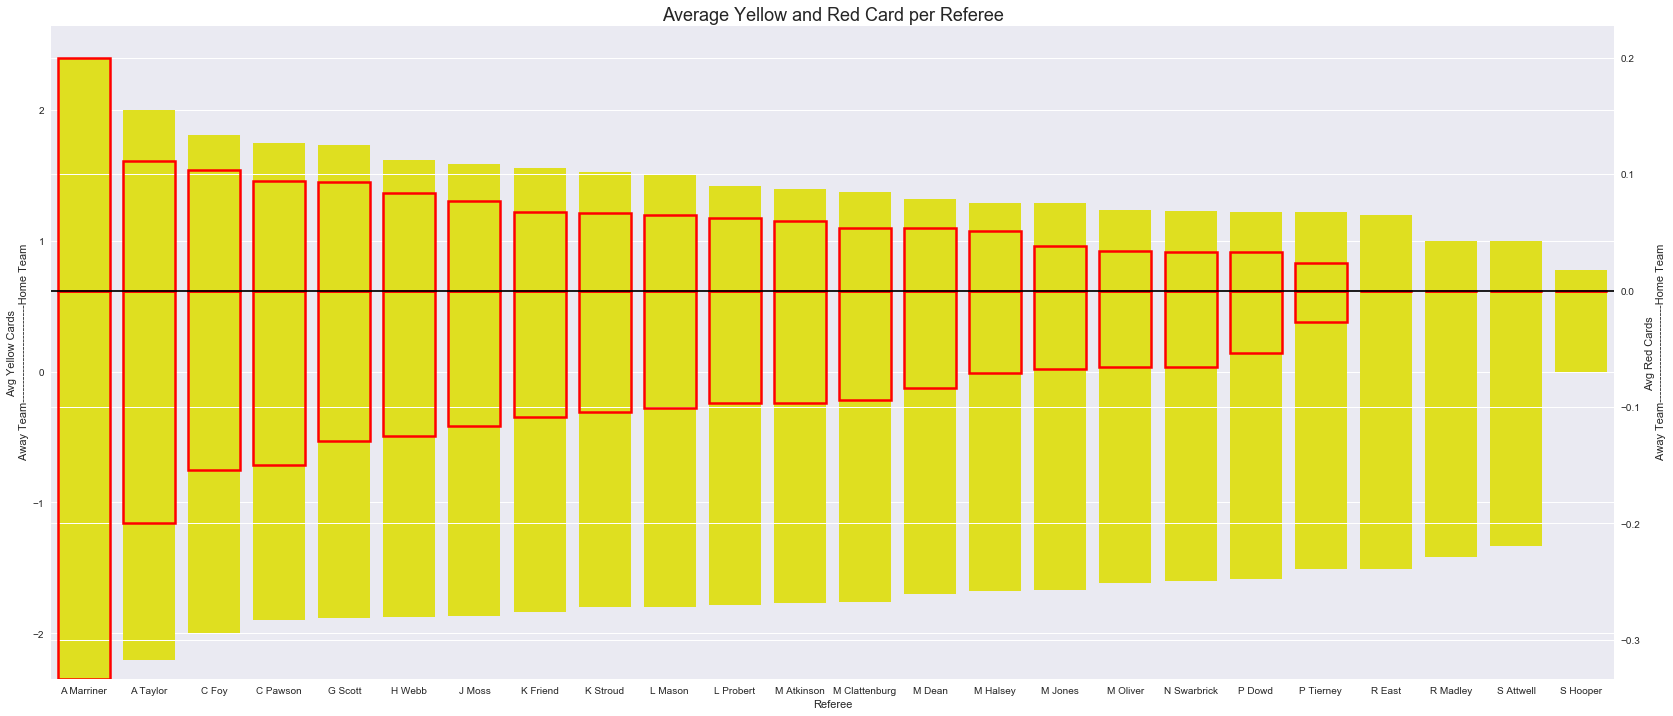

In [29]:
fig, ax=plt.subplots(figsize=(28,12))
ax.plot()
sns.barplot(x=df_Referee.index,y=df_Referee.HY.sort_values(ascending=False),color='Yellow')
sns.barplot(x=df_Referee.index,y=-df_Referee.AY.sort_values(ascending=False),color='Yellow')
plt.ylabel('Avg Yellow Cards\n Away Team--------------------------Home Team')
ax2=ax.twinx()
sns.barplot(x=df_Referee.index,y=df_Referee.HR.sort_values(ascending=False),color='Red',facecolor=(1, 1, 1, 0),linewidth=2.5,edgecolor='Red')
sns.barplot(x=df_Referee.index,y=-df_Referee.AR.sort_values(ascending=False),color='Red',facecolor=(1, 1, 1, 0),linewidth=2.5,edgecolor="Red")
plt.axhline(0,color='Black')
plt.ylabel('Avg Red Cards\n Away Team--------------------------Home Team')
plt.title('Average Yellow and Red Card per Referee', fontsize=18)
plt.show()

### Relegation analysis

In [30]:
#df_2012_13.tail()

In [31]:
df_season1=df_merge.ix[:'19/05/2013'].groupby('HomeTeam').count()['Referee']
df_season2=df_merge.ix['17/08/2013':'11/05/2014'].groupby('HomeTeam').count()['HST']
df_season3=df_merge.ix['16/08/2014':'24/05/2015'].groupby('HomeTeam').count()['AST']
df_season4=df_merge.ix['08/08/2015':].groupby('HomeTeam').count()['HF']

In [32]:
df_relg=pd.concat([df_season1,df_season2,df_season3,df_season4],axis=1)
df_relg.rename(index=str, columns={'Referee':'FY_12_13','HST':'FY_13_14','AST':'FY_14_15','HF':'FY_15_16'},inplace=True)
df_relg.fillna(0,inplace=True)

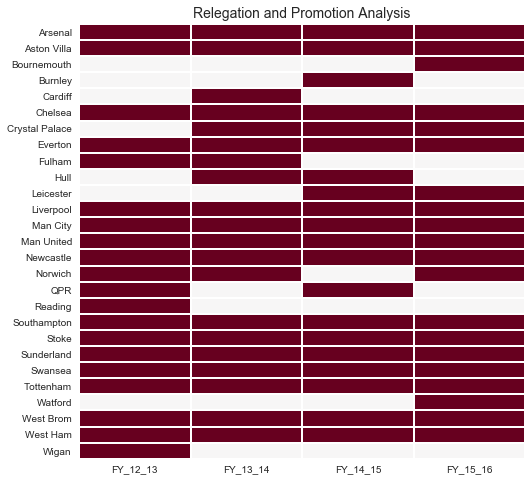

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df_relg,linecolor='white',linewidths=1,center=0,cbar=False)
plt.title('Relegation and Promotion Analysis',fontsize=14)

### Playing Style Analysis Fouls per match

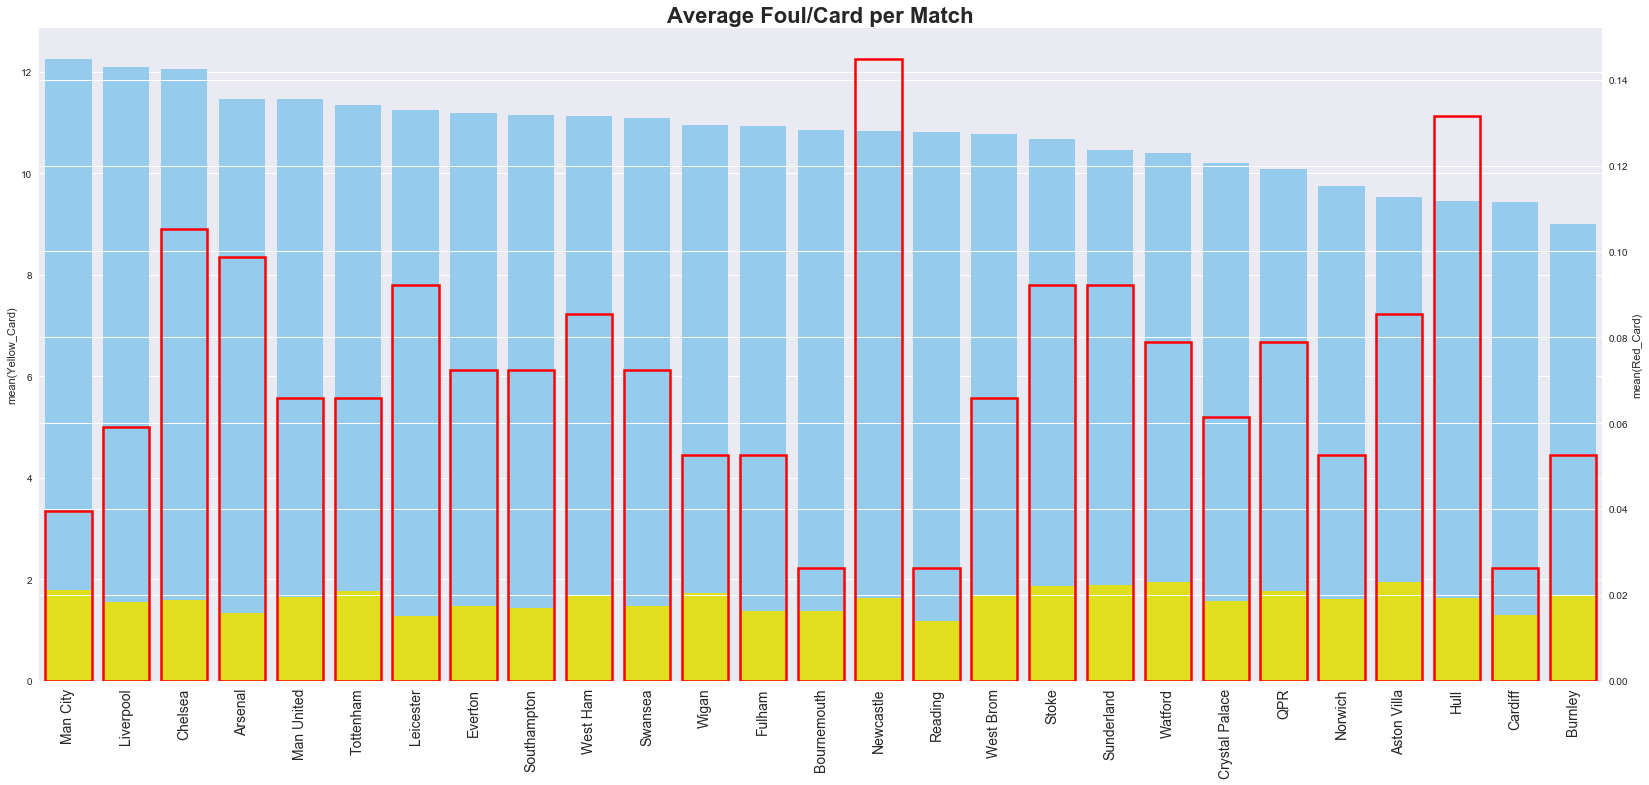

In [34]:
plt.figure(figsize=(20,8))
fig, ax=plt.subplots(figsize=(28,12))
ax.plot()
sns.barplot(x=df_m_ha_m.index,y=df_m_ha_m.Foul.sort_values(ascending=False),color='lightskyblue')
sns.barplot(x=df_m_ha_m.index,y=df_m_ha_m.Yellow_Card,color='yellow')
b=np.arange(len(df_m_ha_m))
plt.xticks(b, df_m_ha_m.index,rotation=90,fontsize=14)
ax2=ax.twinx()
#sns.barplot(x=df_m_ha_m.index,y=-df_m_ha_m.Yellow_Card,color='yellow')
sns.barplot(x=df_m_ha_m.index,y=df_m_ha_m.Red_Card,color='Red',facecolor=(1, 1, 1, 0),linewidth=2.5,edgecolor="Red")
plt.title("Average Foul/Card per Match",fontsize=22,fontweight='bold')
plt.show()

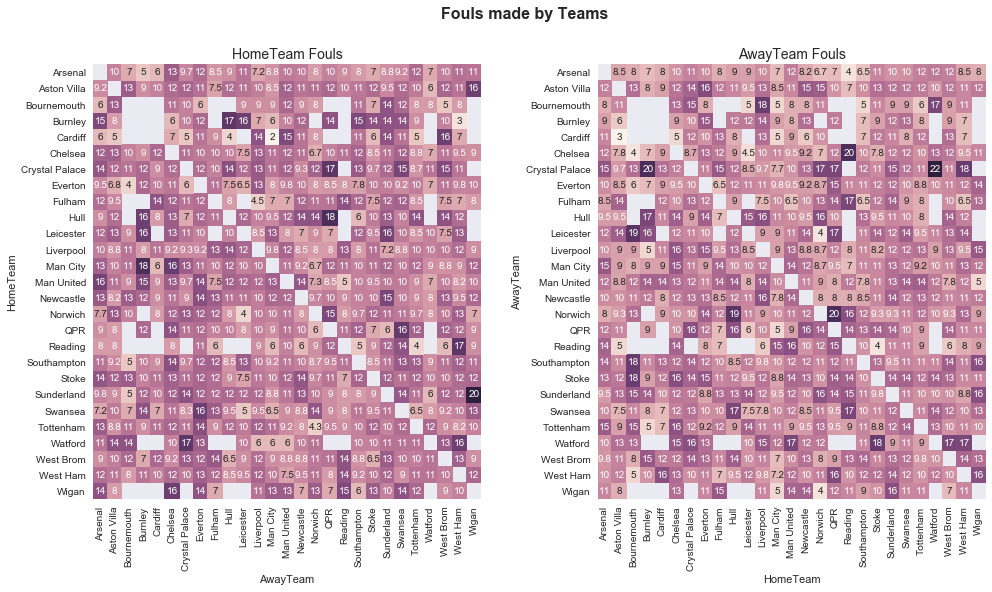

In [35]:
df_foul=df_merge.pivot_table(values=['HF','AF'],index='HomeTeam',columns='AwayTeam',aggfunc=np.mean)
#sns.heatmap(df_foul.xs('HF'))
plt.figure(figsize=(16,8))
plt.suptitle('Fouls made by Teams',fontsize=16,fontweight='bold')
plt.subplots_adjust(hspace=.5,wspace=0.3)
plt.subplot(1,2,1)
sns.heatmap(df_foul.xs(key='HF',level=0,axis=1),annot=True,cbar=False)
plt.title('HomeTeam Fouls',fontsize=14)
plt.subplot(1,2,2)
sns.heatmap(df_foul.xs(key='AF',level=0,axis=1).T,annot=True,cbar=False)
plt.title('AwayTeam Fouls',fontsize=14)
plt.show()